# More EDA

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(palette='colorblind')

In [2]:
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'
robusta_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv'

In [3]:
coffee_df = pd.read_csv(arabica_data_url,index_col=0)

## Which of the following is distributed most similarly to Sweetness?

In [4]:
scores_of_interest = ['Flavor','Balance','Aroma','Body',
                      'Uniformity','Aftertaste','Sweetness']

We can answer this statistically, technically, but it will be easiest to do this
looking ad a plot.

First step is to subset the data:

In [5]:
coffee_df[scores_of_interest].head(2)

,Flavor,Balance,Aroma,Body,Uniformity,Aftertaste,Sweetness
1,8.83,8.42,8.67,8.50,10.0,8.67,10.0
2,8.67,8.42,8.75,8.42,10.0,8.50,10.0


Then we produce a kde plot

<AxesSubplot: ylabel='Density'>

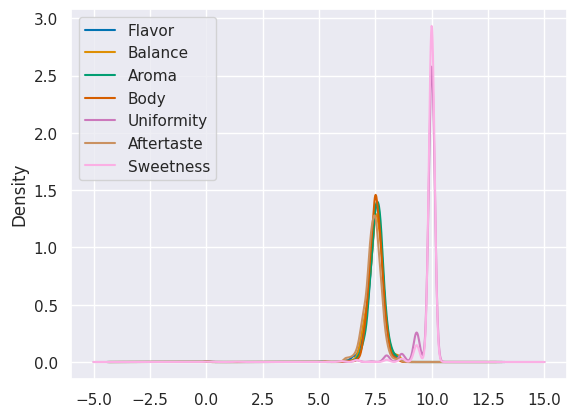

In [6]:
coffee_df[scores_of_interest].plot(kind='kde')

We could also do it with seaborn

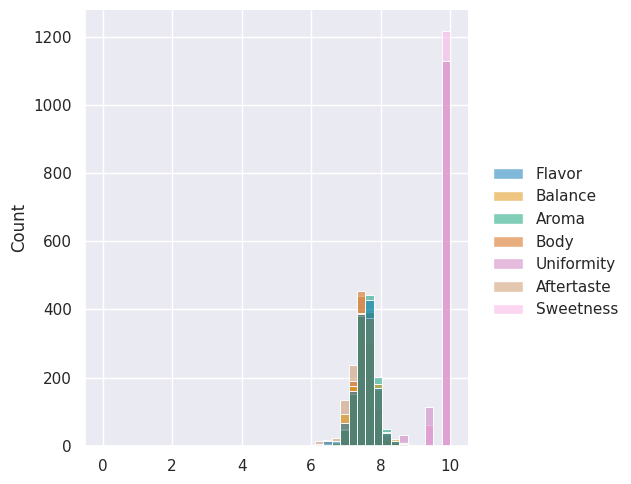

In [7]:
sns.displot(data=coffee_df[scores_of_interest])

the default is not as helpful as using

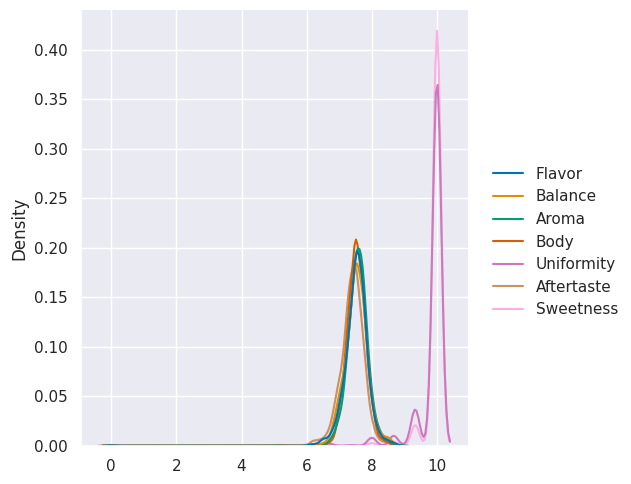

In [8]:
sns.displot(data=coffee_df[scores_of_interest],kind='kde')

If we forget the parameter `kind`, we get its default value.
````{margin}
```{note}
If you show this excerpt, you'll see how I was able to select only a subset of the docstring to display in the notebook, programmatically. You're not required to know how to do it, but if you're curious, you can see.
```
````

In [9]:
print('\n'.join(sns.displot.__doc__.split('\n')[5:10]))

``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)


## Summarizing with multiple variables

So, we can summarize data now, but the summaries we have done so far have treated each variable one at a time.  The most interesting patterns are in often in how multiple variables interact. We'll do some modeling that looks at multivariate functions of data in a few weeks, but for now, we do a little more with summary statistics.

On Monday, we saw how to see how many reviews there were per country, using

In [10]:
total_per_country = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()

What just happened?
![split-apply-combine image showing one data table, it split into 3 part, the sum applied to each part, and the sums combined back into one table](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Groupby splits the whole dataframe into parts where each part has the same value for `Country.of.Origin` and then after that, we extracted the `Number.of.Bags` column, took the sum (within each separate group) and then put it all back together in one table (in this case, a `Series` becuase we picked one variable out)

(groupby-detail)=
### How does Groupby Work?
```{important}
This is more details with code examples on how the groupby works.  If you want
to run this code for yourself, use the download icon at the top right to download
these notes as a notebook.
```

We can view this by saving the groupby object as a variable and exploring it.

In [11]:
country_grouped = coffee_df.groupby('Country.of.Origin')

country_grouped

Trying to look at it without applying additional functions, just tells us the type.  But, it's iterable, so we can loop over.

In [12]:
for country,df in country_grouped:
    print(type(country), type(df))

<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'

````{margin}
```{note}
I used this feature to build the separate view of the communication channels on this website.  You can view that source using the github icon on that page.
```
````

We could manually compute things using the data structure, if needed, though using pandas functionality will usually do what we want. For example:

````{margin}
```{note}
I tried putting this dictionary into the dataframe for display purposes using the regular constructor and got an error, so I googled about making one from a dictionary to get the docs, which is how I learned about the [`from_dict`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html) method and its `orient` parameter which solved my problems.
```
````

In [13]:
bag_total_dict = {}

for country,df in country_grouped:
    tot_bags =  df['Number.of.Bags'].sum()
    bag_total_dict[country] = tot_bags

pd.DataFrame.from_dict(bag_total_dict, orient='index',
                           columns = ['Number.of.Bags.Sum'])

,Number.of.Bags.Sum
Brazil,30534
Burundi,520
China,55
Colombia,41204
Costa Rica,10354
Cote d?Ivoire,2
Ecuador,1
El Salvador,4449
Ethiopia,11761
Guatemala,36868


is the same as what we did before

## Sorting DataFrames

We saved the totals, so we can check what type that is.

In [14]:
type(total_per_country)

pandas.core.series.Series

It's a pandas series, so we can use the `sort_values` method.

````{margin}
```{admonition} Try it yourself
There is another sort method, `sort_index` what would that one do?
```
````

In [15]:
total_per_country.sort_values(ascending=False)

Country.of.Origin
Colombia                        41204
Guatemala                       36868
Brazil                          30534
Mexico                          24140
Honduras                        13167
Ethiopia                        11761
Costa Rica                      10354
Nicaragua                        6406
El Salvador                      4449
Kenya                            3971
Uganda                           3868
Tanzania, United Republic Of     3760
Peru                             2336
Taiwan                           1914
Indonesia                        1658
Thailand                         1310
United States (Hawaii)            833
Malawi                            557
Panama                            537
Burundi                           520
Haiti                             390
United States                     361
Philippines                       259
Rwanda                            150
Laos                               81
United States (Puerto Rico)     

## More plot types

We can also look at the distributions

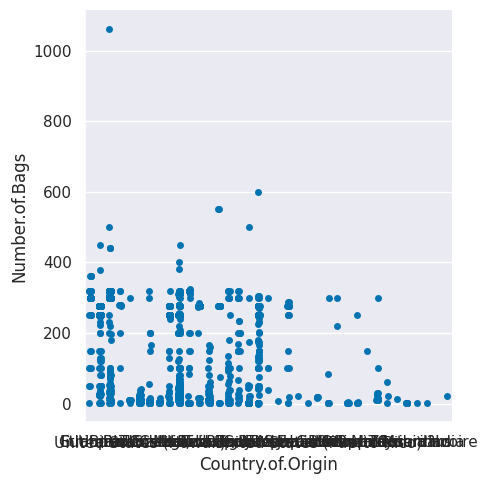

In [16]:
sns.catplot(data=coffee_df,x='Country.of.Origin',y='Number.of.Bags')

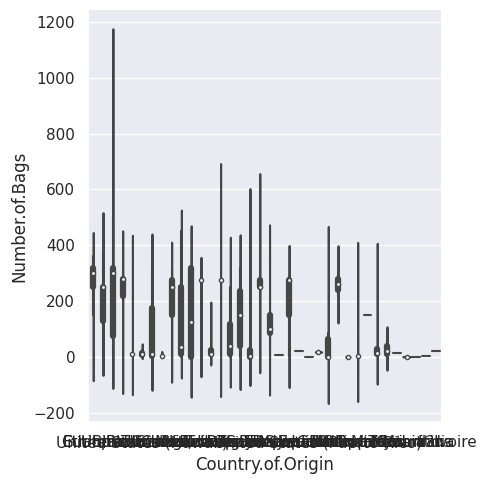

In [17]:
sns.catplot(data=coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='violin')

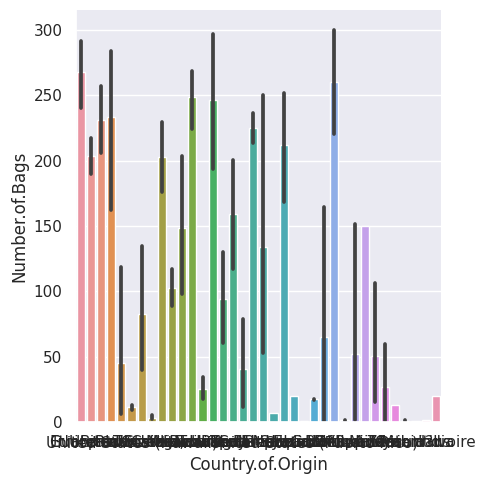

In [18]:
sns.catplot(data=coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar')

````{margin}
```{note}
We can use `head(10)` here too.
```
````

## How can we pick the top 10 countries out?

In [19]:
total_per_country.sort_values(ascending=False)[:10]

Country.of.Origin
Colombia       41204
Guatemala      36868
Brazil         30534
Mexico         24140
Honduras       13167
Ethiopia       11761
Costa Rica     10354
Nicaragua       6406
El Salvador     4449
Kenya           3971
Name: Number.of.Bags, dtype: int64

In [20]:
type(total_per_country.sort_values(ascending=False)[:10])

pandas.core.series.Series

this is a series, but we can change it to a DataFrame with `reset_index()` this will also add a new index column but a side effect is that it becomes a DataFrame again

In [21]:
top_total_df = total_per_country.sort_values(ascending=False)[:10].reset_index()
top_total_df

,Country.of.Origin,Number.of.Bags
0,Colombia,41204
1,Guatemala,36868
2,Brazil,30534
3,Mexico,24140
4,Honduras,13167
5,Ethiopia,11761
6,Costa Rica,10354
7,Nicaragua,6406
8,El Salvador,4449
9,Kenya,3971


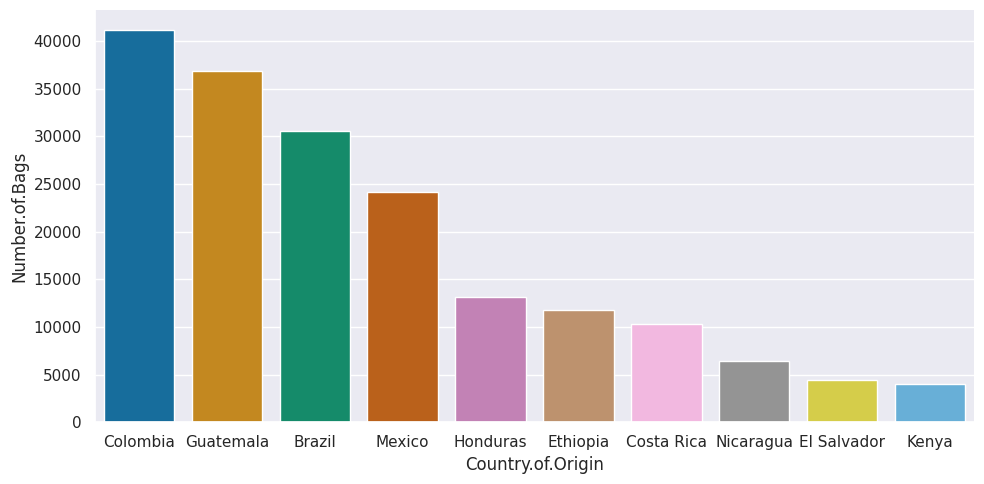

In [22]:
sns.catplot(data=top_total_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect=2)

this got the number of countries fewer, bu they were still hard to read because they were small and still overlapping, so I added `aspect=2` to make it 2x as wide as tall and give it more space. We can also use a similar strategy to pull out just these country names and get all the data for those.

In [23]:
top_countries = total_per_country.sort_values(ascending=False)[:10].index

In [24]:
coffee_df[coffee_df['Country.of.Origin'].isin(top_countries)].head(2)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


I forgot the `isin` method in class and had to look that up, I more often need to filter by numerical columns or selecting a single value.

In [25]:
top_coffee_df = coffee_df[coffee_df['Country.of.Origin'].isin(top_countries)]

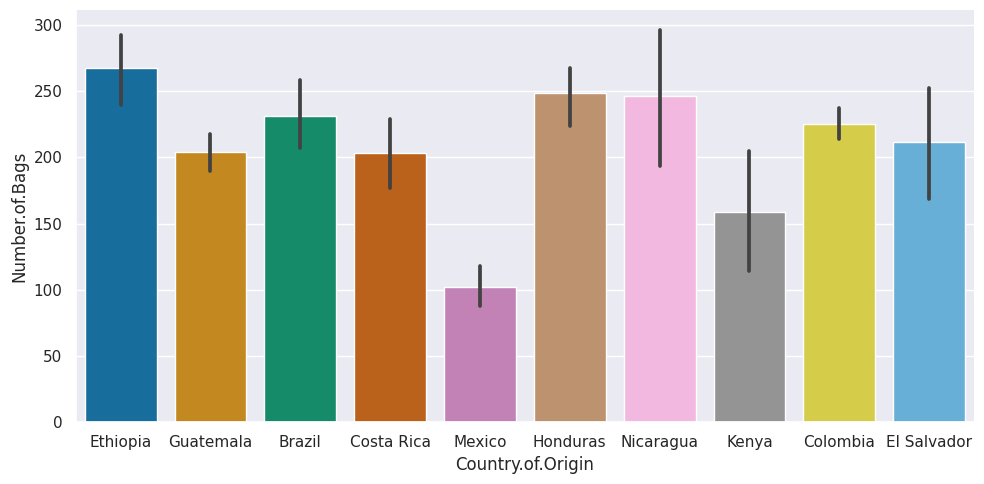

In [26]:
sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect=2)

In [27]:
top_coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                952 non-null    object 
 1   Owner                  945 non-null    object 
 2   Country.of.Origin      952 non-null    object 
 3   Farm.Name              694 non-null    object 
 4   Lot.Number             205 non-null    object 
 5   Mill                   760 non-null    object 
 6   ICO.Number             908 non-null    object 
 7   Company                789 non-null    object 
 8   Altitude               833 non-null    object 
 9   Region                 919 non-null    object 
 10  Producer               812 non-null    object 
 11  Number.of.Bags         952 non-null    int64  
 12  Bag.Weight             952 non-null    object 
 13  In.Country.Partner     952 non-null    object 
 14  Harvest.Year           932 non-null    object 
 15  Gradi

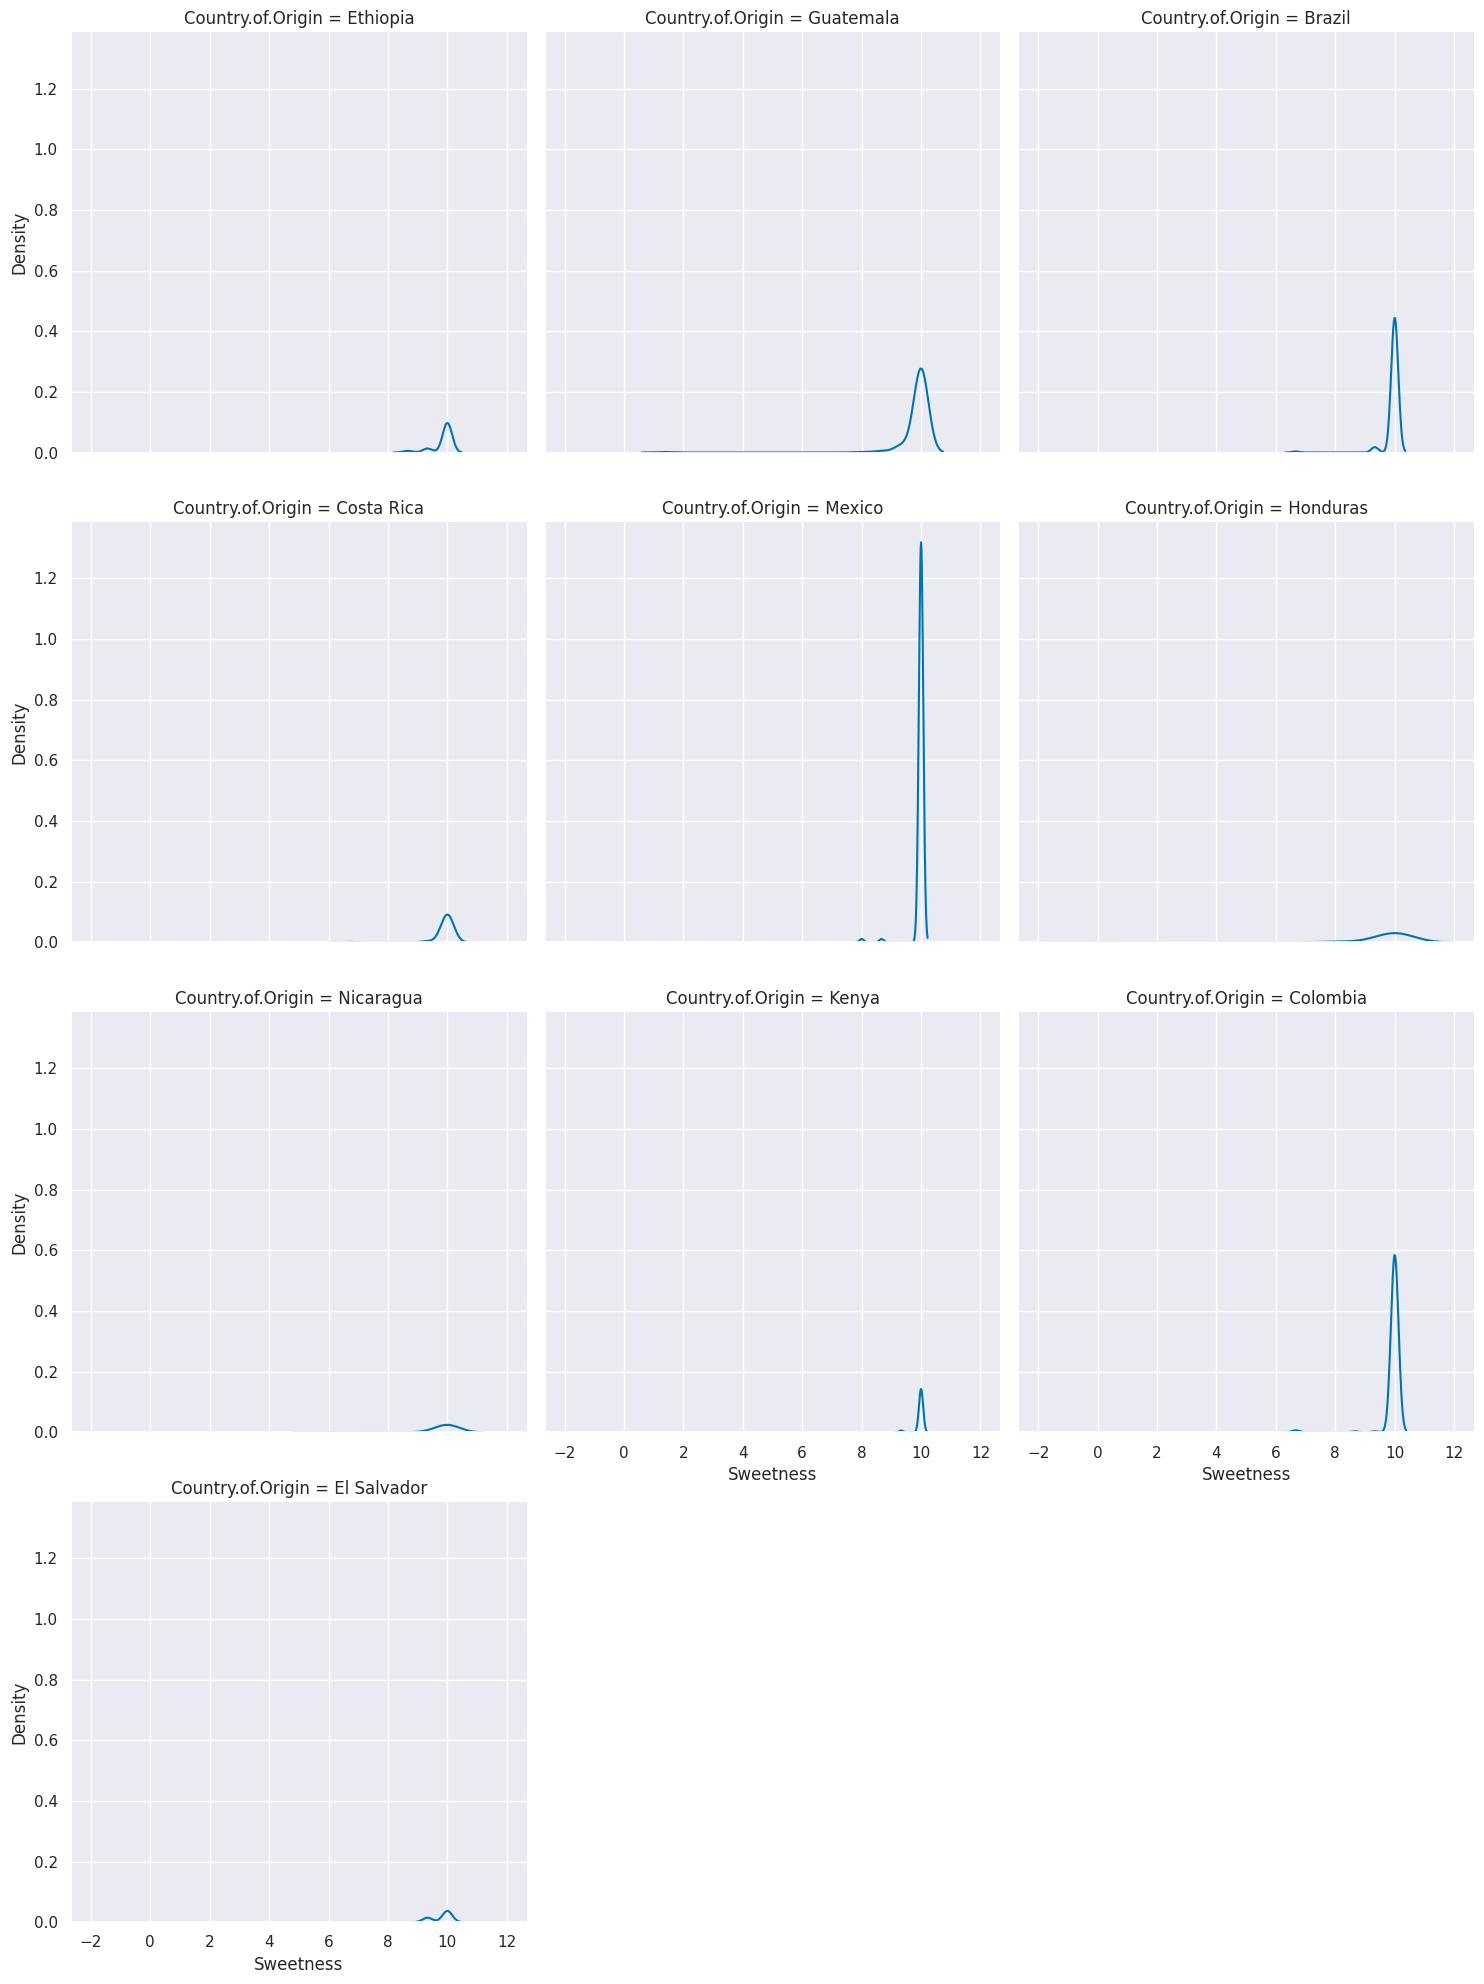

In [28]:
sns.displot(top_coffee_df, x='Sweetness', kind='kde', col='Country.of.Origin',col_wrap=3)

We'll see next week how to manipulate the dataset so that we can plot multiple scores this way.

Variable types and data types
Related but not the same.

## General Plotting Ideas

There are lots of type of plots, we saw the basic patterns of how to use them and we've used a few types, but we cannot (and do not need to) go through every single type.  There are general patterns that you can use that will help you think about what type of plot you might want and help you understand them to be able to customize plots.  

[Seaborn's main goal is opinionated defaults and flexible customization](https://seaborn.pydata.org/tutorial/introduction.html#opinionated-defaults-and-flexible-customization


### Anatomy of a figure

First is the [matplotlib](https://matplotlib.org) structure of a figure.  BOth pandas and seaborn and other plotting libraries use matplotlib. Matplotlib was used [in visualizing the first Black hole](https://numfocus.org/case-studies/first-photograph-black-hole).

![annotated graph](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

This is a lot of information, but these are good to know things.  THe most important is the figure and the axes.

```{admonition} Try it Yourself
Make sure you can explain what is a figure and what are axes in your own words and why that distinction matters. Discuss in office hours if you are unsure.
```

*that image was [drawn with code](https://matplotlib.org/stable/gallery/showcase/anatomy.html#anatomy-of-a-figure)* and that page explains more.


### Plotting Function types in Seaborn

Seaborn has two *levels* or groups of plotting functions. Figure and axes.  Figure level fucntions can plot with subplots.

![summary of plot types](https://seaborn.pydata.org/_images/function_overview_8_0.png)


This is from thie [overivew]() section of the official seaborn tutorial. It also includes a comparison of
[figure vs axes](https://seaborn.pydata.org/tutorial/function_overview.html#relative-merits-of-figure-level-functions) plotting.

The [official introduction](https://seaborn.pydata.org/tutorial/introduction.html) is also a good read.

### More

The [seaborn gallery](https://seaborn.pydata.org/examples/index.html) and [matplotlib gallery](https://matplotlib.org/2.0.2/gallery.html) are nice to look at too.

## Styling Plots

In [29]:
sns.set_theme()

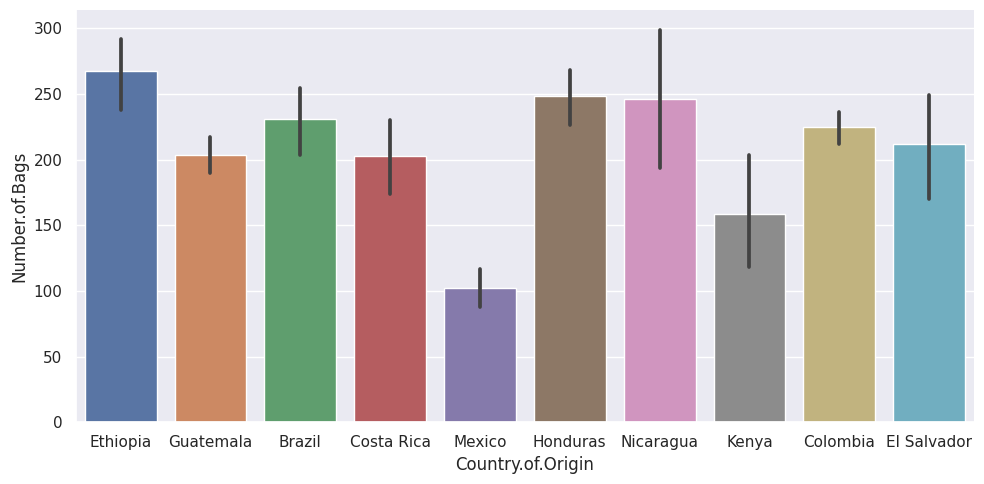

In [30]:
sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect=2)

This by default styles the plots to be more visually appealing

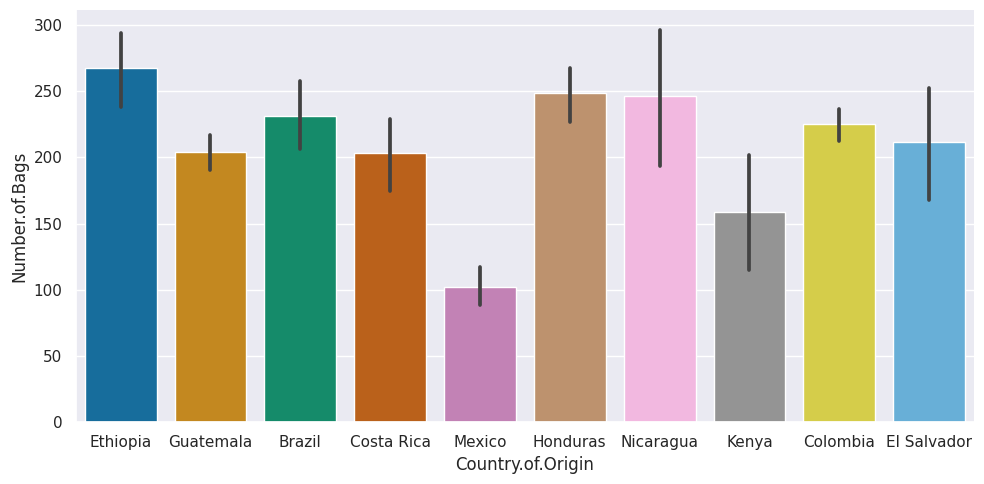

In [31]:
sns.set_theme(palette='colorblind')
sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect=2)

the colorblind palette is more distinguishable under a variety fo colorblindness types. [for more](https://gist.github.com/mwaskom/b35f6ebc2d4b340b4f64a4e28e778486)

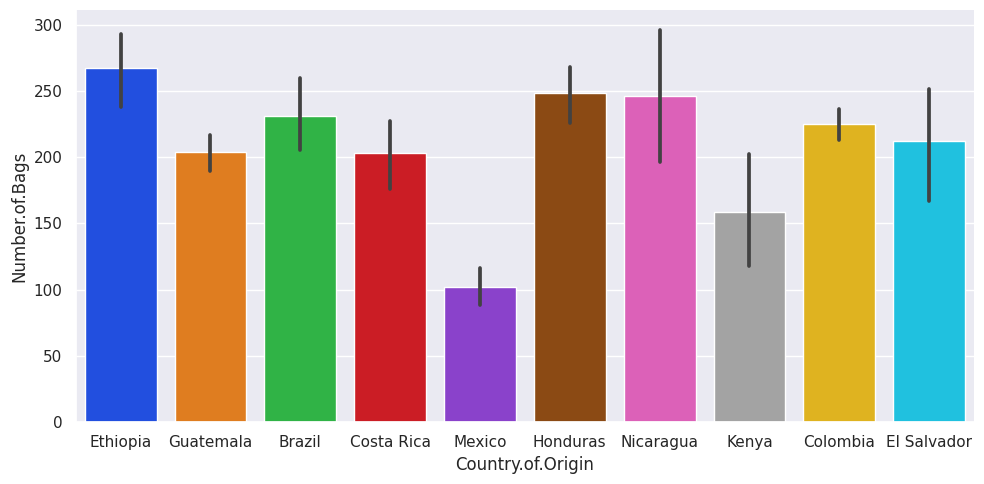

In [32]:
sns.set_theme(palette='bright')
sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect=2)

Colorblind is a good default, but you can choose others that yo like more too.

[more on colors](https://seaborn.pydata.org/tutorial/color_palettes.html#general-principles-for-using-color-in-plots)

to prepare plots for posters vs printing, etc you can use:

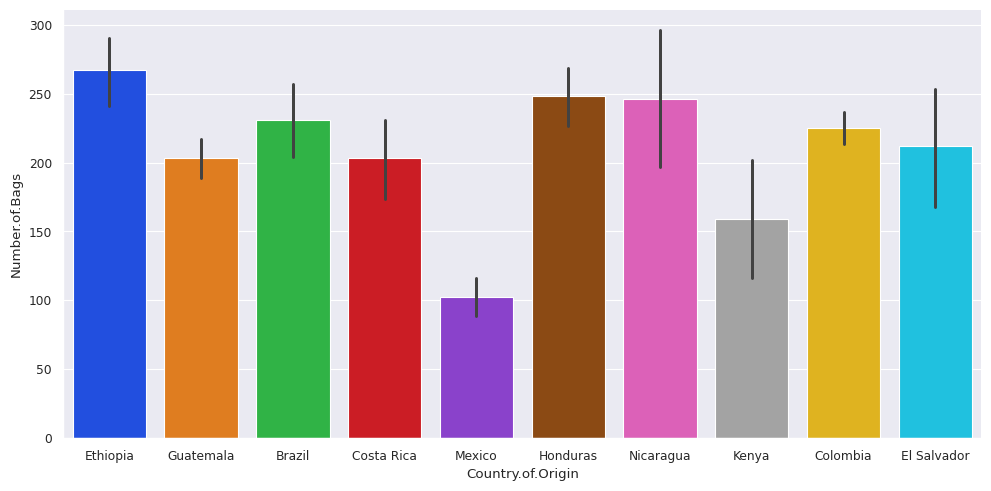

In [33]:
with sns.plotting_context('paper'):
    sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect =2)

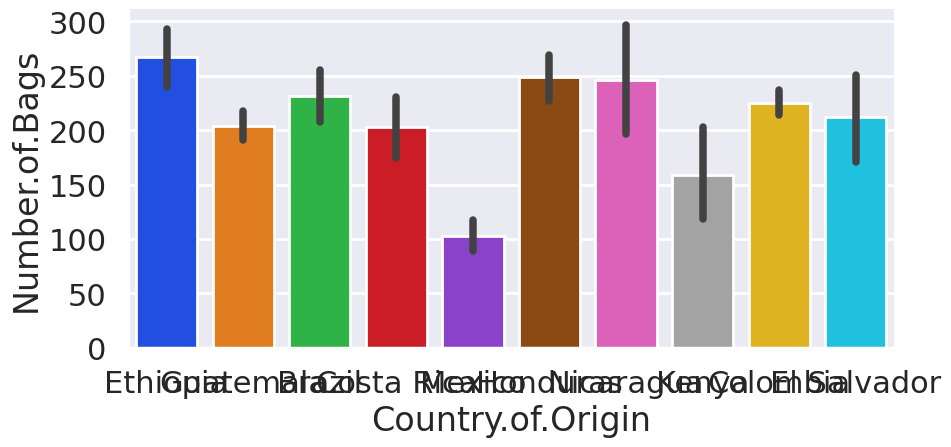

In [34]:
with sns.plotting_context('poster'):
    sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect =2)

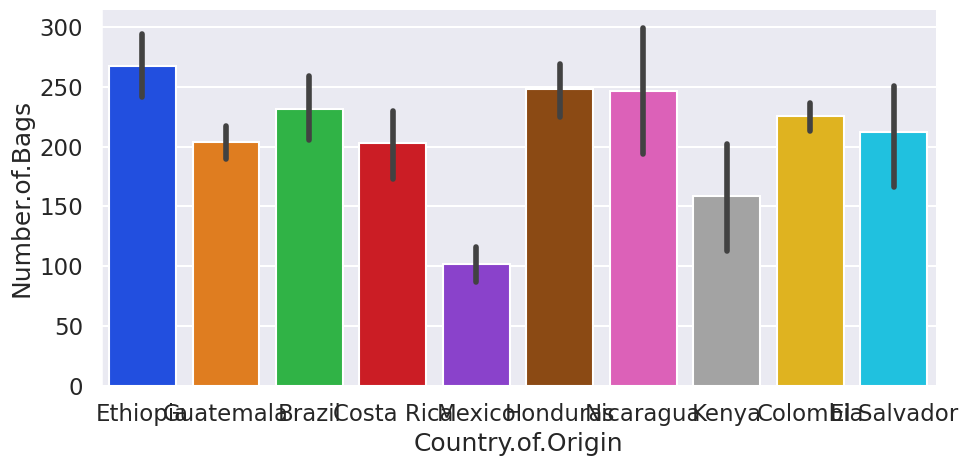

In [35]:
with sns.plotting_context('talk'):
    sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect =2)

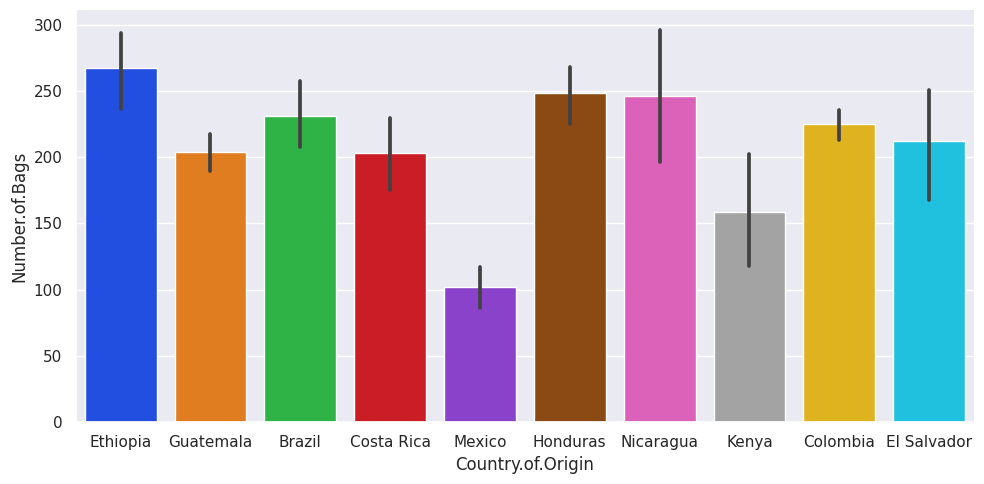

In [36]:
with sns.plotting_context('notebook'):
    sns.catplot(data=top_coffee_df,x='Country.of.Origin',y='Number.of.Bags',
           kind='bar',aspect =2)

It's not perfect, but it gives you a good starting point.

## More Practice

- Make a table thats total number of bags and mean and count of scored for each of the variables in the `scores_of_interest` list.
- Make a bar chart of the mean score for each variable `scores_of_interest` grouped by country.

## Questions

```{note}

Submit questions as Issues

```


## Questions After Class